<a href="https://colab.research.google.com/github/MananParekh17/first/blob/main/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
pip install scikit-learn==1.4.1.post1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/csv_files/spam.csv', encoding='latin-1')


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Target']=encoder.fit_transform(df['Target'])

In [12]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep='first')

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
df.shape

(5572, 2)

## EDA

In [17]:
df['Target'].value_counts()

0    4825
1     747
Name: Target, dtype: int64

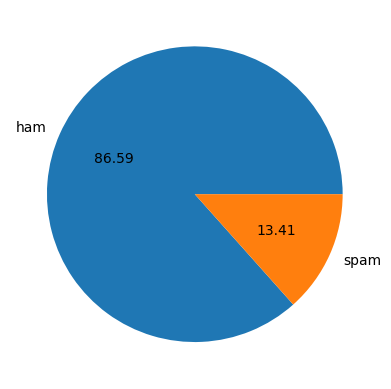

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()



In [19]:
!pip install nltk




In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
df['num_characters']=df['Text'].apply(len)

In [23]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['Target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

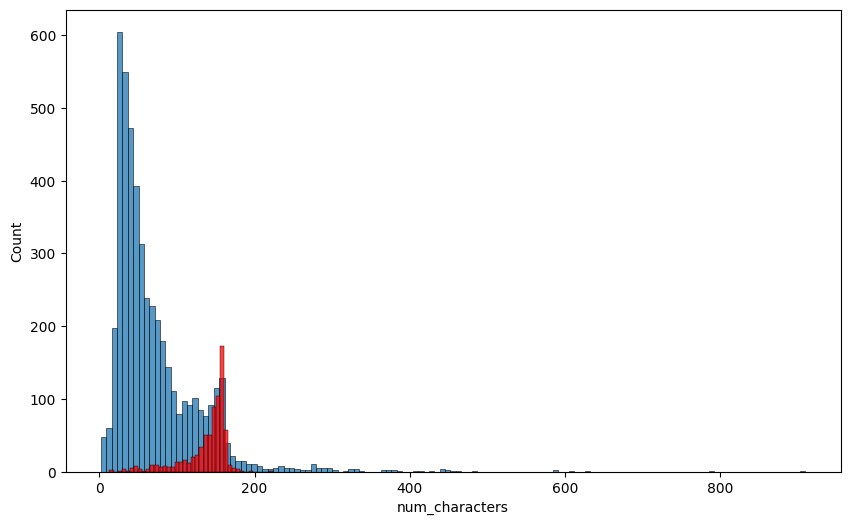

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')


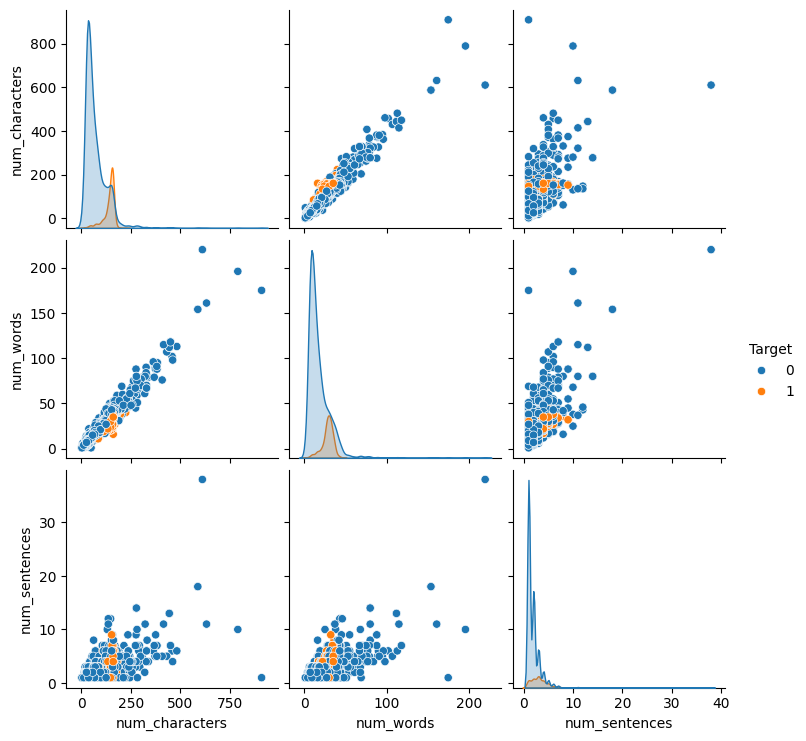

In [30]:
sns.pairplot(df,hue='Target')

In [31]:
df.corr()

<ipython-input-31-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sentences,0.265332,0.631881,0.685165,1.000000


<ipython-input-32-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

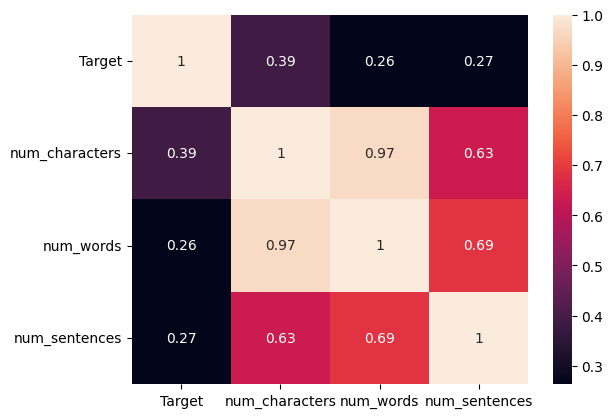

In [32]:
sns.heatmap(df.corr(),annot=True)

#Data preprocessing
lower case    
tokenization  
removing special characters   
removing stop words and punctuations  
stemming




In [33]:
!pip install stopwords
import stopwords

In [34]:

  nltk.download('stopwords')
  stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('running')
ps.stem('loving')

'love'

In [37]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))



  return " ".join(y)

In [38]:
transform_text('hello $ loved how are dancing ##% yo@u JJJ machine learning ')

'hello love danc yo u jjj machin learn'

In [39]:
df['Text'][5567]

'This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.'

In [40]:
transform_text(df['Text'][5567])

'2nd time tri 2 contact u pound prize 2 claim easi call 087187272008 now1 10p per minut'

In [41]:
df['transformed_text']=df['Text'].apply(transform_text)

In [42]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [44]:
spam_wc=wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep=" "))

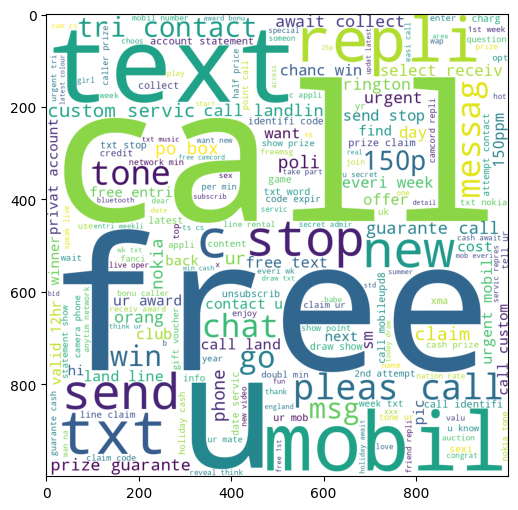

In [45]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep=" "))

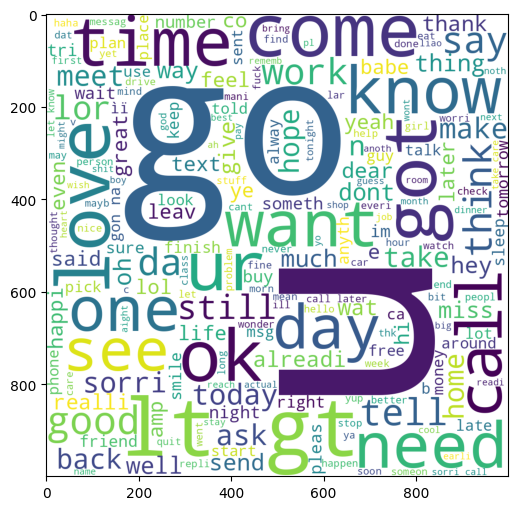

In [47]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for msg in df[df['Target']==1 ]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [49]:
len(spam_corpus)


11490

In [50]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 365),
 ('free', 219),
 ('2', 174),
 ('txt', 169),
 ('ur', 144),
 ('u', 141),
 ('text', 139),
 ('mobil', 135),
 ('4', 120),
 ('claim', 115),
 ('stop', 114),
 ('repli', 112),
 ('prize', 94),
 ('get', 88),
 ('tone', 74),
 ('servic', 72),
 ('send', 70),
 ('new', 69),
 ('nokia', 68),
 ('award', 66),
 ('week', 62),
 ('cash', 62),
 ('urgent', 62),
 ('win', 61),
 ('contact', 61),
 ('pleas', 57),
 ('phone', 57),
 ('c', 51),
 ('custom', 51),
 ('collect', 51)]

In [51]:
#from collections import Counter
#sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#why giving error


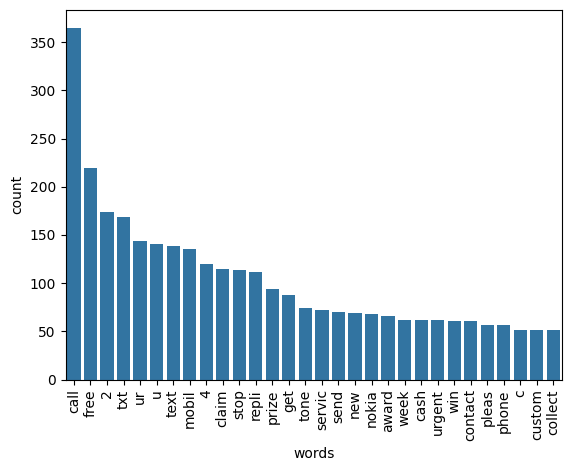

In [52]:

data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['words', 'count'])
sns.barplot(x='words', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['Target']==0 ]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [54]:
len(ham_corpus)


38221

In [55]:

Counter(ham_corpus).most_common(30)

[('u', 979),
 ('go', 417),
 ('get', 357),
 ('gt', 318),
 ('lt', 316),
 ('2', 300),
 ('come', 295),
 ('call', 291),
 ('know', 248),
 ('ok', 245),
 ('like', 244),
 ('got', 242),
 ('love', 241),
 ('ur', 237),
 ('good', 230),
 ('time', 228),
 ('want', 212),
 ('day', 212),
 ('need', 174),
 ('one', 174),
 ('4', 163),
 ('lor', 162),
 ('home', 161),
 ('sorri', 156),
 ('see', 153),
 ('think', 151),
 ('da', 150),
 ('take', 149),
 ('still', 148),
 ('n', 139)]

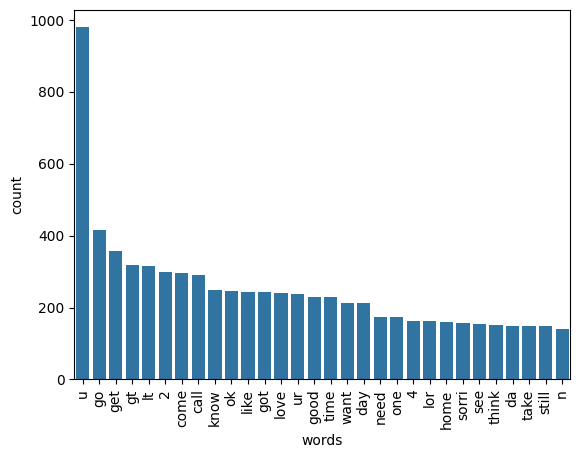

In [56]:

data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['words', 'count'])
sns.barplot(x='words', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [58]:
x=tfidf.fit_transform(df['transformed_text']).toarray() #change tfidf to cv for another

In [59]:
x.shape

(5572, 6708)

In [60]:
y = df['Target'].values

In [61]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split


In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [65]:
gnb = GaussianNB()
mnb=MultinomialNB()
bnb = BernoulliNB()


In [66]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [67]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#precision should be higher for this case coz there should be no cases in which its is classified as spam but actually its not
#so it is selected

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [68]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier





In [70]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [71]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BigC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}



In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision

In [73]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9659192825112107, 0.9761904761904762)

In [74]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

  print("For ", name)
  print("Accuracy ",current_accuracy)
  print("Precision", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy  0.9659192825112107
Precision 0.9761904761904762
For  KN
Accuracy  0.8986547085201794
Precision 1.0
For  NB
Accuracy  0.957847533632287
Precision 1.0
For  DT
Accuracy  0.9228699551569507
Precision 0.8461538461538461
For  LR
Accuracy  0.9443946188340807
Precision 0.9444444444444444
For  RF
Accuracy  0.9650224215246637
Precision 0.983739837398374


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy  0.9533632286995516
Precision 0.9344262295081968
For  BigC
Accuracy  0.9587443946188341
Precision 0.9242424242424242
For  ETC
Accuracy  0.9695067264573991
Precision 1.0
For  GBDT
Accuracy  0.9426008968609866
Precision 0.9607843137254902
For  xgb
Accuracy  0.9668161434977578
Precision 0.984


In [75]:
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898655,1.000000
2,NB,0.957848,1.000000
8,ETC,0.969507,1.000000
10,xgb,0.966816,0.984000
5,RF,0.965022,0.983740
0,SVC,0.965919,0.976190
9,GBDT,0.942601,0.960784
4,LR,0.944395,0.944444
6,AdaBoost,0.953363,0.934426
7,BigC,0.958744,0.924242


In [77]:
import matplotlib.pyplot as plt


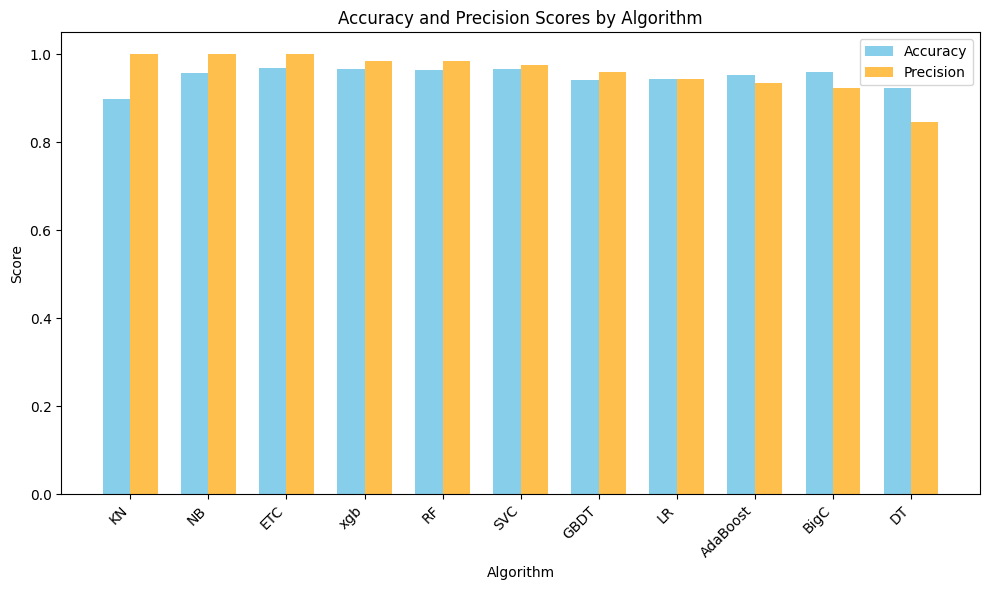

In [78]:

plt.figure(figsize=(10, 6))

bar_width = 0.35

# Calculate the x-coordinates for the bars
index = np.arange(len(performance_df))

# Bar plot for accuracy
plt.bar(index, performance_df['Accuracy'], bar_width, color='skyblue', label='Accuracy')

# Bar plot for precision
plt.bar(index + bar_width, performance_df['Precision'], bar_width, color='orange', alpha=0.7, label='Precision')

plt.title('Accuracy and Precision Scores by Algorithm')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.xticks(index + bar_width / 2, performance_df['Algorithm'], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()


In [79]:


tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Target'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    #'AdaBoost': abc, not so accurate results and takes too muchh time
    #'BigC': bc, not so accurate results and takes too muchh time
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}



accuracy_scores = []
precision_scores = []
max_features_values = []
algorithm_names = []

# Loop over different values of max_features
for i in range(1000, x.shape[1] + 1, 500):



    # Create TfidfVectorizer with the current max_features value
    tfidf = TfidfVectorizer(max_features=i)
    x = tfidf.fit_transform(df['transformed_text']).toarray()
    y = df['Target'].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

    # Loop over classifiers
    for name, clf in clfs.items():
        # Train classifier and get accuracy and precision
        current_accuracy, current_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

        # Append accuracy and precision scores to the respective lists
        accuracy_scores.append(current_accuracy)
        precision_scores.append(current_precision)

        # Append current max_features value to the list
        max_features_values.append(i)

        # Append current algorithm name to the list
        algorithm_names.append(name)

        print("For i =", i, "and", name)
        print("Accuracy:", current_accuracy)
        print("Precision:", current_precision)
        print()

# Create DataFrame
performance_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'Max_Features': max_features_values,  #have to append it too
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
})

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135
0.957847533632287
[[957   0]
 [ 47 111]]
1.0
0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921
For i = 1000 and SVC
Accuracy: 0.9704035874439462
Precision: 0.9770992366412213

For i = 1000 and KN
Accuracy: 0.9121076233183857
Precision: 1.0

For i = 1000 and NB
Accuracy: 0.9668161434977578
Precision: 0.9763779527559056

For i = 1000 and DT
Accuracy: 0.9201793721973094
Precision: 0.8556701030927835

For i = 1000 and LR
Accuracy: 0.9587443946188341
Precision: 0.9666666666666667

For i = 1000 and RF
Accuracy: 0.9704035874439462
Precision: 0.9844961240310077

For i = 1000 and ETC
Accuracy: 0.968609865470852
Precision: 1.0

For i = 1000 and GBDT
Accuracy: 0.9336322869955157
Precision: 0.9285714285714286

For i = 1000 and xgb
Accuracy: 0.9596412556053812
Precision: 0.9448818897637795

For i = 1500 and SVC
Accuracy: 0.9704035874439462
Precision: 0.9770992366412213

For i = 1500 and KN
Accuracy: 0.9085201793721973
Precision

In [80]:
performance_df = performance_df.sort_values(by=['Precision', 'Accuracy'], ascending=[False, False])
performance_df.head(30)


,Algorithm,Max_Features,Accuracy,Precision
24,ETC,2000,0.973991,1.0
15,ETC,1500,0.972197,1.0
87,ETC,5500,0.970404,1.0
32,RF,2500,0.969507,1.0
33,ETC,2500,0.969507,1.0
51,ETC,3500,0.969507,1.0
69,ETC,4500,0.969507,1.0
6,ETC,1000,0.968610,1.0
60,ETC,4000,0.968610,1.0
78,ETC,5000,0.968610,1.0


In [81]:
# prompt: copy performance_df to csv file

performance_df.to_csv('performance_df.csv', index=False)


In [82]:
'''from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('ETC',etc),('RF',rfc),('NB',mnb)],voting='hard')
voting.fit(x_train,y_train)
'''

"from sklearn.ensemble import VotingClassifier\nvoting = VotingClassifier(estimators=[('ETC',etc),('RF',rfc),('NB',mnb)],voting='hard')\nvoting.fit(x_train,y_train)\n"

In [83]:
'''
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
'''

'\ny_pred = voting.predict(x_test)\nprint("Accuracy",accuracy_score(y_test,y_pred))\nprint("Precision",precision_score(y_test,y_pred))\n'

In [84]:
tfidf = TfidfVectorizer(max_features=2000)
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Target'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [85]:
current_accuracy, current_precision = train_classifier(etc, x_train, y_train, x_test, y_test)

In [86]:
print(current_accuracy)

0.9739910313901345


In [87]:
print(current_precision)

1.0


In [88]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))
pickle.dump(transform_text,open('transform_text2.pkl','wb'))